In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json


In [31]:
# Caminho do arquivo JSON neste ambiente
file_path = "//content/TelecomX_Data.json"

# Carregar e normalizar os dados
with open(file_path, "r") as f:
    raw_data = json.load(f)

df = pd.json_normalize(raw_data, sep="_")

# Converter campos numéricos
df["account_Charges_Total"] = pd.to_numeric(df["account_Charges_Total"], errors="coerce")
df["account_Charges_Monthly"] = pd.to_numeric(df["account_Charges_Monthly"], errors="coerce")

# Visualizar as primeiras linhas para confirmar
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


<ipython-input-30-2433652237>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


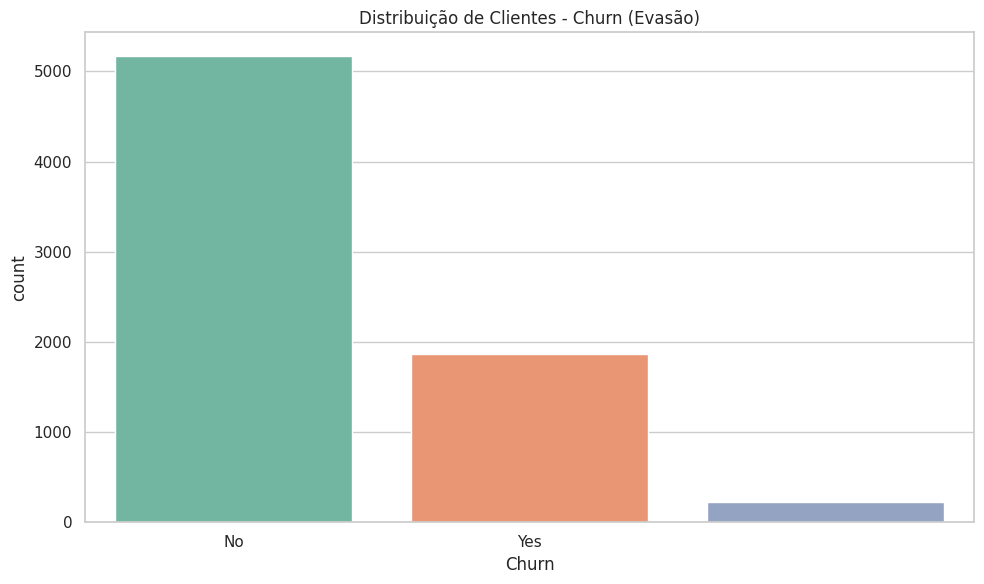

<ipython-input-30-2433652237>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="account_Charges_Total", data=df, palette="Set3")


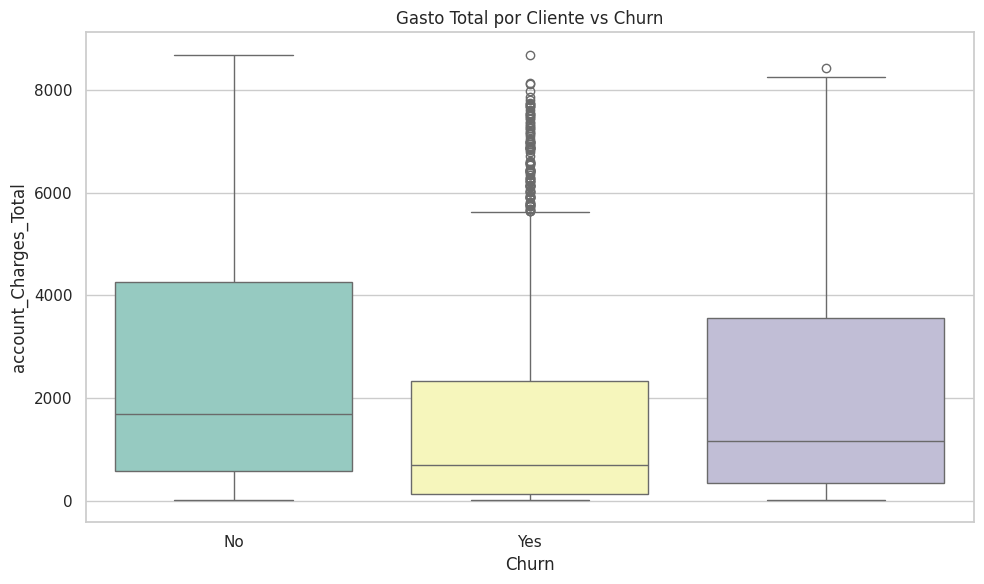

<ipython-input-30-2433652237>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="customer_tenure", data=df, palette="Set1")


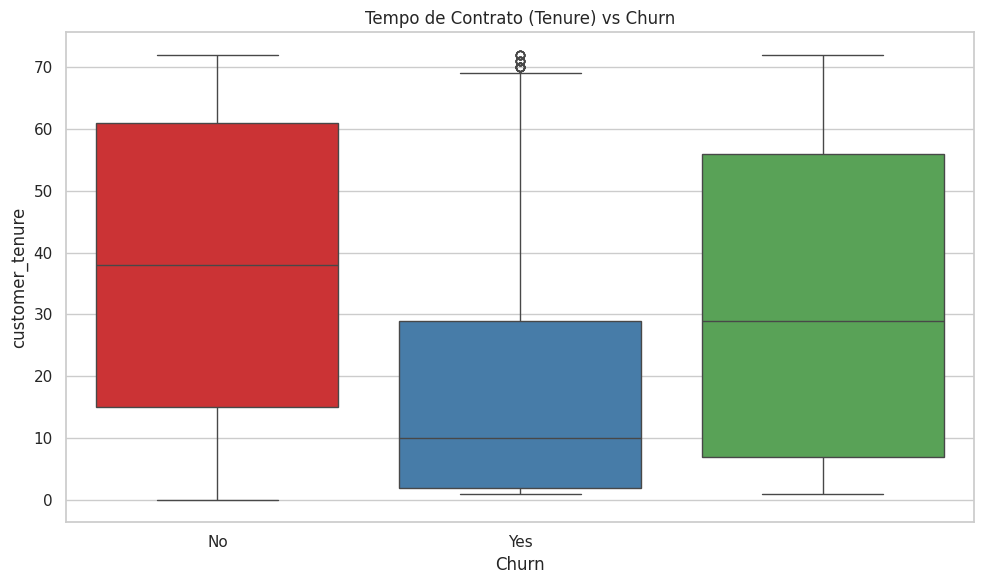

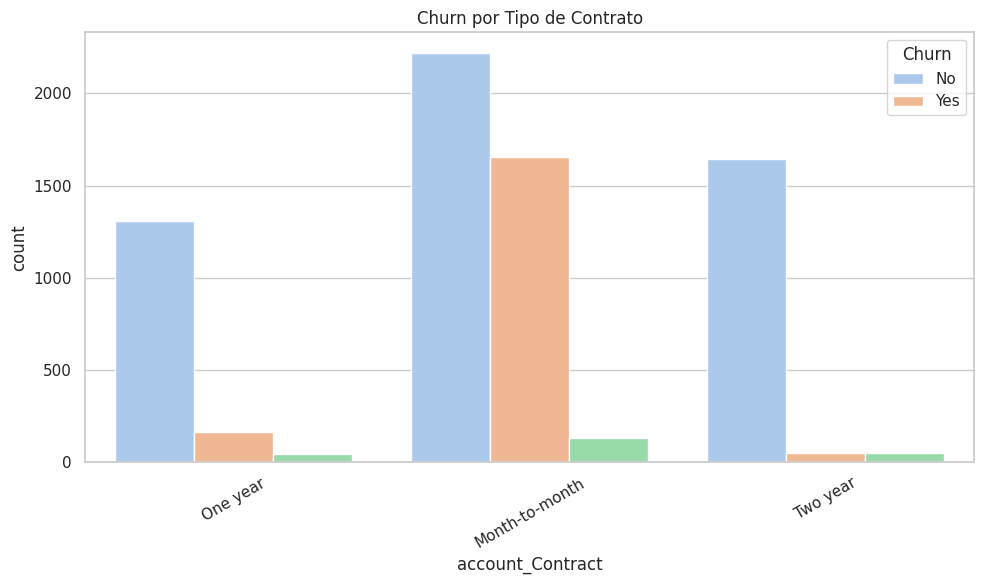

In [30]:
# Recarregar bibliotecas e dados após o reset do ambiente
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Reaplicar estilo
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Recarregar o JSON
file_path = "//content/TelecomX_Data.json"
with open(file_path, "r") as f:
    raw_data = json.load(f)

# Normalizar dados
df = pd.json_normalize(raw_data, sep="_")
df["account_Charges_Total"] = pd.to_numeric(df["account_Charges_Total"], errors="coerce")
df["account_Charges_Monthly"] = pd.to_numeric(df["account_Charges_Monthly"], errors="coerce")

# 1. Distribuição de Churn
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Distribuição de Clientes - Churn (Evasão)")
plt.tight_layout()
plt.show()

# 2. Boxplot: Gasto Total vs Churn
sns.boxplot(x="Churn", y="account_Charges_Total", data=df, palette="Set3")
plt.title("Gasto Total por Cliente vs Churn")
plt.tight_layout()
plt.show()

# 3. Boxplot: Tempo de Contrato (tenure) vs Churn
sns.boxplot(x="Churn", y="customer_tenure", data=df, palette="Set1")
plt.title("Tempo de Contrato (Tenure) vs Churn")
plt.tight_layout()
plt.show()

# 4. Churn por Tipo de Contrato
sns.countplot(data=df, x="account_Contract", hue="Churn", palette="pastel")
plt.title("Churn por Tipo de Contrato")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import json

# Carregando os dados
with open("TelecomX_Data.json") as f:
    raw_data = json.load(f)

df = pd.json_normalize(raw_data, sep="_")
df["account_Charges_Total"] = pd.to_numeric(df["account_Charges_Total"], errors="coerce")
df["account_Charges_Monthly"] = pd.to_numeric(df["account_Charges_Monthly"], errors="coerce")

# Criar arquivo PDF
with PdfPages("Relatorio_Analise_TelecomX.pdf") as pdf:

    # Página 1: Distribuição de Churn
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x="Churn", palette="Set2")
    plt.title("Distribuição de Clientes - Churn (Evasão)")
    pdf.savefig()
    plt.close()

    # Página 2: Gasto Total vs Churn
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="Churn", y="account_Charges_Total", palette="Set3")
    plt.title("Gasto Total por Cliente vs Churn")
    pdf.savefig()
    plt.close()

    # Página 3: Tempo de Contrato (Tenure) vs Churn
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="Churn", y="customer_tenure", palette="Set1")
    plt.title("Tempo de Contrato (Tenure) vs Churn")
    pdf.savefig()
    plt.close()

    # Página 4: Churn por Tipo de Contrato
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x="account_Contract", hue="Churn", palette="pastel")
    plt.title("Churn por Tipo de Contrato")
    plt.xticks(rotation=30)
    pdf.savefig()
    plt.close()

    # Página 5: Tabela - Estatísticas por Churn
    fig, ax = plt.subplots(figsize=(10, 4))
    stats = df.groupby("Churn")[["account_Charges_Total", "customer_tenure"]].mean().round(2)
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=stats.values,
                     colLabels=stats.columns,
                     rowLabels=stats.index,
                     cellLoc='center',
                     loc='center')
    plt.title("Médias de Gasto Total e Tempo de Contrato por Churn")
    pdf.savefig()
    plt.close()

print("✅ Relatório PDF gerado com sucesso como 'Relatorio_Analise_TelecomX.pdf'")


<ipython-input-32-631057710>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="Set2")
<ipython-input-32-631057710>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="account_Charges_Total", palette="Set3")
<ipython-input-32-631057710>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="customer_tenure", palette="Set1")


✅ Relatório PDF gerado com sucesso como 'Relatorio_Analise_TelecomX.pdf'


In [33]:
from google.colab import files
files.download("Relatorio_Analise_TelecomX.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Instalar a biblioteca
!pip install fpdf

# Importar após instalar
from fpdf import FPDF

# Criar classe PDF
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 14)
        self.cell(0, 10, "Análise de Evasão de Clientes - Telecom X", ln=True, align="C")
        self.ln(5)

    def chapter_title(self, title):
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, title, ln=True)
        self.ln(2)

    def chapter_body(self, body):
        self.set_font("Arial", "", 11)
        self.multi_cell(0, 7, body)
        self.ln()

# Criar e popular o PDF
pdf = PDF()
pdf.add_page()

pdf.chapter_title("Objetivo")
pdf.chapter_body("A Telecom X enfrenta alta taxa de evasão de clientes (churn)...")

pdf.chapter_title("ETL - Extração, Transformação e Carga")
pdf.chapter_body(
    "- Extração via JSON com estrutura aninhada\n"
    "- Transformação usando pandas.json_normalize\n"
    "- Conversão de colunas numéricas (ex.: Charges_Total)\n"
    "- Limpeza de dados e padronização de colunas"
)

pdf.chapter_title("EDA - Análise Exploratória de Dados")
pdf.chapter_body(
    "1. A maioria dos clientes permanece, mas há evasão significativa.\n"
    "2. Clientes que evadem têm menor gasto total.\n"
    "3. Clientes com pouco tempo de contrato (tenure) têm maior risco de churn.\n"
    "4. Contratos mensais apresentam a maior taxa de cancelamento."
)

pdf.chapter_title("Conclusões")
pdf.chapter_body(
    "- Clientes com pouco tempo de permanência e contratos mensais têm maior probabilidade de churn.\n"
    "- Gasto acumulado baixo reforça o risco de cancelamento precoce."
)

pdf.chapter_title("Recomendações Estratégicas")
pdf.chapter_body(
    "1. Incentivar planos anuais com benefícios.\n"
    "2. Focar campanhas de retenção nos primeiros meses.\n"
    "3. Implementar ações segmentadas com base no perfil do cliente.\n"
    "4. Monitorar engajamento com os serviços."
)

# Salvar o arquivo
pdf.output("Relatorio_TelecomX_Churn.pdf")

# Baixar no Colab
from google.colab import files
files.download("Relatorio_TelecomX_Churn.pdf")